# **Project: TMBD 5000 Movies Dataset Analysis**

BY MERE, ADAEZE KASOPE


# **Table of Contents**

- Introduction
- Data Wrangling
- Exploratory Data Analysis
-Conclusions

# **INTRODUCTION**


Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It is a compilation of two (2) dataset (movies and credits) to form a dataset. The total number of columns are 23, for the course of this analysis, only 12 columns were used.

# **Question(s) for Analysis**

Below are the questions that would be addressed over the course of the project report. The questions were derived after a critical view of the data set, as well as the available data attributed to the movie. These questions are inquiries that enables a better understanding of what goes on during and after movie production.

Question 1: What is an accurate measurement for the financial success of a movie?

Question 2: What columns contributes to the large form of success of a movie?

Question 3: Investigate the relationship between a movie's budget and its revenue.

Question 4: Which genre earns the most profit?

Question 5: Are there specific release dates or periods that tend to generate high revenues or better rating?

Question 6: Do longer movies have better rating or higher revenues?

Tips: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, use good coding practices, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names.

In [ ]:
# For this project, I will be using NumPy, Pandas and MatPlotLib frameworks to wrangle and explore my dataset, as well as
# for aided visualisations of the results.
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After importing, running the two (2) datasets provided and various checks on their individual dataframe is done. To get better information on the data sets, rum their shapes and datatypes. The first five (5) rows of the dataset is the viewed to see how each of the dataframe is set up.  

In [ ]:
# starting with tmdb_5000_movies data set
# load the TMDB_5000_movies dataset, and view the first 5 rows of the dataframe
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# check the shape of the data, number of rows, as well as the columns in the dataset
movies.shape

(4803, 20)

In [ ]:
# to check out the datatypyes and the presence of missing values (null values), use the info syntax.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
# to find duplicate rows in a data set; df_movies.duplicated() (the response would be a boolean/logic one that is true or false)
# given that we are working with a large dataset, we need to know the exact number of duplicated rows
sum(movies.duplicated())

0

In [ ]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
# next is the tmdb_5000_credit data set
credits = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
# load the TMDB_5000_credits dataset, and view the first 5 rows of the dataframe
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# check the shape of the data, number of rows, as well as the columns in the dataset
credits.shape

(4803, 4)

In [ ]:
# to check out the datatypyes and the presence of missing values (null values), use the info syntax.
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


> Unlike the movies data set with missing values, the credit data set info syntax shows that there are no missing values in the columns. From 1st & 2nd dataset we can see that, both datasets contains data about the same movies so, merging both data is the next thing to do.
After this run preliminary checks on the new data set

In [ ]:
df_movies = movies.merge(credits, on='title')
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df_movies.shape

(4809, 23)

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

<a id='wrangling'></a>
## Data Pre-Processing

> At this point, making the data set more understandable is the next step. Removing irrelevant features, checking and dropping missing values. The total number of columns are 24, for the course of this analysis, only 12 columns would be used.

In [ ]:
# Creating a new dataframe for the columns we would be working with
df_N_movies=df_movies[['revenue', 'title', 'budget', 'genres', 'popularity', 'cast', 'production_companies', 'release_date', 'vote_average', 'vote_count', 'runtime', 'crew']]
df_N_movies.head()

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew
0,2787965087,Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,7.2,11800,162.0,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,6.9,4500,169.0,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,880674609,Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,6.3,4466,148.0,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,1084939099,The Dark Knight Rises,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,7.6,9106,165.0,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,284139100,John Carter,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,6.1,2124,132.0,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# to view the exact number of missing values for each column should incase you are working with a large data set
df_N_movies.isnull().sum()

revenue                 0
title                   0
budget                  0
genres                  0
popularity              0
cast                    0
production_companies    0
release_date            1
vote_average            0
vote_count              0
runtime                 2
crew                    0
dtype: int64

In [ ]:
# drop missing values
df_N_movies.dropna(inplace=True)
df_N_movies.isnull().sum()

<ipython-input-16-c44043ae8eee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies.dropna(inplace=True)


revenue                 0
title                   0
budget                  0
genres                  0
popularity              0
cast                    0
production_companies    0
release_date            0
vote_average            0
vote_count              0
runtime                 0
crew                    0
dtype: int64

<a id='wrangling'></a>
## Text Handling

> Here it is neccessary to change the arrangement of the text in some columns by Formatting; genres, cast & crew columns

In [ ]:
df_N_movies['genres'].iloc[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
df_N_movies['genres'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4806 entries, 0 to 4808
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
4806 non-null   object
dtypes: object(1)
memory usage: 75.1+ KB


> The data type of the genre column is string, so first we have to convert it into the list.

> Next is to import Ast and create a function for converting the column values into string & creating a seperate list containing only genres.

In [ ]:
import ast
ast.literal_eval('[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]')

[{'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 28, 'name': 'Action'}]

In [ ]:
def extract(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [ ]:
# To convert
convert: any ('[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]')

In [ ]:
df_N_movies['genres'] = df_N_movies['genres'].apply(extract)
df_N_movies.head()

<ipython-input-22-016c64ce677e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['genres'] = df_N_movies['genres'].apply(extract)


,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,7.2,11800,162.0,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,6.9,4500,169.0,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,6.3,4466,148.0,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,7.6,9106,165.0,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,6.1,2124,132.0,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


> We would be extracting just the names of the production companies

In [ ]:
df_N_movies['production_companies'] = movies['production_companies'].apply(extract)
df_N_movies.head()

<ipython-input-23-42bff21e4439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['production_companies'] = movies['production_companies'].apply(extract)


,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[Columbia Pictures, Danjaq, B24]",2015-10-26,6.3,4466,148.0,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,7.6,9106,165.0,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",[Walt Disney Pictures],2012-03-07,6.1,2124,132.0,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


> Here we can observe that, there are many cast mentioned in the cast column, So we are going to extract 3 original names from each cast

In [ ]:
# create a function to edit the cast column
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter=counter+1

        else:
            break

    return L

In [ ]:
# Input function
df_N_movies['cast'] = df_N_movies['cast'].apply(convert3)
df_N_movies.head()

<ipython-input-25-d4d002376984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['cast'] = df_N_movies['cast'].apply(convert3)


,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Columbia Pictures, Danjaq, B24]",2015-10-26,6.3,4466,148.0,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[Christian Bale, Michael Caine, Gary Oldman]","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,7.6,9106,165.0,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Walt Disney Pictures],2012-03-07,6.1,2124,132.0,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# create a function to extract just the director's name
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break

    return L

In [ ]:
# Input function
df_N_movies['crew'] = df_N_movies['crew'].apply(fetch_director)
df_N_movies.head()

<ipython-input-27-6a6f1b7cefb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_movies['crew'] = df_N_movies['crew'].apply(fetch_director)


,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron]
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,[Gore Verbinski]
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Columbia Pictures, Danjaq, B24]",2015-10-26,6.3,4466,148.0,[Sam Mendes]
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[Christian Bale, Michael Caine, Gary Oldman]","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,7.6,9106,165.0,[Christopher Nolan]
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Walt Disney Pictures],2012-03-07,6.1,2124,132.0,[Andrew Stanton]


In [ ]:
# create a mask to remove values less than 1 million in the budget column
df_New = df_N_movies[df_N_movies['budget']>=1000000]
df_New.tail(15)

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew
4405,7202,Special,1000000,"[Drama, Fantasy, Science Fiction]",1.260314,"[Michael Rapaport, Josh Peck, Robert Baker]",[],2006-01-30,6.6,32,81.0,[Hal Haberman]
4410,0,Heli,1000000,"[Crime, Drama]",3.629777,"[Armando Espitia, Andrea Vergara, Linda Gonzalez]",[Tricastle],2013-08-09,6.2,32,105.0,[Amat Escalante]
4413,0,Hits,1000000,"[Drama, Comedy]",3.638411,"[Meredith Hagner, Matt Walsh, James Adomian]",[],2014-01-21,4.9,23,96.0,[David Cross]
4421,0,Snow White: A Deadly Summer,1000000,"[Horror, Thriller]",0.653495,"[Shanley Caswell, Maureen McCormick, Eric Robe...",[Corona Pictures],2012-03-16,4.8,11,85.0,[David DeCoteau]
4423,0,My Last Day Without You,1000000,"[Comedy, Drama, Romance]",0.153625,"[Ken Duken, Nicole Beharie, Reg E. Cathey]","[JoBro Productions & Film Finance, Scythia Films]",2011-06-11,5.7,3,90.0,[Stefan C. Schaefer]
4425,0,Doc Holliday's Revenge,1000000,[Western],0.459400,"[Tom Berenger, Ashley Hayes, Eric Roberts]","[Arrowstorm Entertainment, The Klimax]",2014-06-01,3.2,3,84.0,[David DeCoteau]
4429,0,Bang Bang Baby,1000000,"[Science Fiction, Drama, Music]",0.973323,"[Jane Levy, Peter Stormare, Justin Chatwin]","[Decipher Entertainment, Presque Isle Films, L...",2014-09-08,6.6,8,90.0,[Jeffrey St. Jules]
4451,0,1982,1000000,[Drama],0.175885,"[Bokeem Woodbine, Sharon Leal, Wayne Brady]",[Absinthe Productions],2013-12-31,5.0,1,90.0,[Tommy Oliver]
4527,500000,Beyond the Mat,2053648,[Documentary],2.778633,"[Mick Foley, Terry Funk, Vince McMahon]",[],1999-10-22,7.8,17,102.0,[Barry W. Blaustein]
4541,271841,Seven Samurai,2000000,"[Action, Drama]",39.756748,"[Toshirō Mifune, Takashi Shimura, Yoshio Inaba]",[],1954-04-26,8.2,878,207.0,[Akira Kurosawa]


In [ ]:
# create a mask to remove values less than 1 million within the revenue column
df_New = df_New[df_New['revenue']>1000000]
df_New.tail(15)

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew
4350,10037390,Godzilla 2000,1000000,"[Adventure, Horror, Action, Science Fiction]",3.322721,"[Takehiro Murata, Naomi Nishida, Mayu Suzuki]","[Lawrence Bender Productions, Paramount Classi...",1999-12-11,5.9,43,107.0,[Takao Okawara]
4351,16566240,Blue Valentine,3500000,"[Drama, Romance]",26.881611,"[Ryan Gosling, Michelle Williams, Mike Vogel]",[Republic Pictures (I)],2010-12-27,6.9,890,112.0,[Derek Cianfrance]
4352,13350369,Transamerica,1000000,[Drama],9.773398,"[Felicity Huffman, Kevin Zegers, Elizabeth Peña]","[Concert Promotion International, Shangri-La E...",2005-12-23,6.9,144,103.0,[Duncan Tucker]
4353,101758490,The Devil Inside,1000000,"[Thriller, Horror]",13.152822,"[Fernanda Andrade, Simon Quarterman, Evan Helm...","[Worldview Entertainment, Dragonfly Entertainm...",2012-01-06,4.6,262,83.0,[William Brent Bell]
4354,40000000,Beyond the Valley of the Dolls,2090000,"[Comedy, Drama, Thriller]",4.289003,"[Dolly Read, Cynthia Myers, Marcia McBroom]","[British Film Institute (BFI), Amaro Films, Co...",1970-07-17,6.6,53,109.0,[Russ Meyer]
4355,9000000,Love Me Tender,1000000,"[Drama, Action, Western, Music, Romance]",1.444258,"[Richard Egan, Debra Paget, Elvis Presley]","[Rhino Films, Such Much Films]",1956-11-15,5.5,21,89.0,[Robert D. Webb]
4356,46243000,An Inconvenient Truth,1000000,[Documentary],14.139004,"[Al Gore, Billy West, Ronald Reagan]",[Magnolia Pictures],2006-01-24,6.7,251,100.0,[Davis Guggenheim]
4357,7800000,Sands of Iwo Jima,1000000,"[Action, Drama, History, War]",3.851000,"[John Wayne, John Agar, Adele Mara]",[],1949-12-14,6.2,33,100.0,[Allan Dwan]
4359,6833445,The Green Inferno,5000000,"[Action, Adventure, Horror, Thriller]",17.845161,"[Lorenza Izzo, Ariel Levy, Sky Ferreira]","[Duplass Brothers Productions, Venture Forth]",2014-09-04,5.0,349,100.0,[Eli Roth]
4361,9138338,The Sessions,1000000,"[Drama, Romance, Comedy]",9.115486,"[John Hawkes, Helen Hunt, William H. Macy]","[Sundial Pictures, Votiv Films, Rooks Nest Ent...",2012-05-02,6.6,179,98.0,[Ben Lewin]


**Research Question 1** ( What movie had the most financial success?)

> The financial success of a movie can be measured using various metrics, but the most accurate measurement for the financial success of a movie is to calculate the Return On Investment (ROI) which gives the total amount generated from a movie. Then we would find which movie has the highest ROI (return on investment generated).                                                         
To find the ROI; Revenue - Budget / Budget

> First create a ROI column, so we can get the percentage of the return on investment on each movie



In [ ]:
df_New['ROI'] = ((df_New['revenue'] - df_New['budget']) / df_New['budget'])* 100
df_New.head()

<ipython-input-30-2682559efae4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_New['ROI'] = ((df_New['revenue'] - df_New['budget']) / df_New['budget'])* 100


,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew,ROI
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,[Gore Verbinski],220.333333
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Columbia Pictures, Danjaq, B24]",2015-10-26,6.3,4466,148.0,[Sam Mendes],259.459024
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[Christian Bale, Michael Caine, Gary Oldman]","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,7.6,9106,165.0,[Christopher Nolan],333.975640
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Walt Disney Pictures],2012-03-07,6.1,2124,132.0,[Andrew Stanton],9.284269


In [ ]:
# create the summary statistics for the budget
df_New.describe()

,revenue,budget,popularity,vote_average,vote_count,runtime,ROI
count,3.002000e+03,3.002000e+03,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000
mean,1.299730e+08,4.336842e+07,30.435447,6.310593,1035.262825,111.342438,317.515092
std,1.903603e+08,4.482096e+07,36.969586,0.849251,1447.890669,20.392679,749.283036
min,1.046166e+06,1.000000e+06,0.019984,3.000000,1.000000,41.000000,-95.212133
25%,2.182322e+07,1.300000e+07,11.612170,5.800000,207.000000,97.000000,13.533749
50%,6.343674e+07,2.900000e+07,21.739194,6.300000,510.000000,108.000000,136.533947
75%,1.554599e+08,6.000000e+07,38.680109,6.900000,1225.750000,122.000000,334.632537
max,2.787965e+09,3.800000e+08,875.581305,8.500000,13752.000000,248.000000,12324.256142


In [ ]:
# sort the ROI column and check which movie has the highest ROI
df_ROI = df_New.sort_values('ROI', ascending=False)
df_ROI.head()

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew,ROI
4266,184925486,Snow White and the Seven Dwarfs,1488423,"[Fantasy, Animation, Family]",80.171283,"[Adriana Caselotti, Lucille La Verne, Harry St...",[Allure Entertainment],1937-12-20,6.9,1914,83.0,[David Hand],12324.256142
4339,117235147,Rocky,1000000,[Drama],72.198080,"[Sylvester Stallone, Talia Shire, Burt Young]","[United Artists, Eon Productions]",1976-11-21,7.5,1791,119.0,[John G. Avildsen],11623.514700
4353,101758490,The Devil Inside,1000000,"[Thriller, Horror]",13.152822,"[Fernanda Andrade, Simon Quarterman, Evan Helm...","[Worldview Entertainment, Dragonfly Entertainm...",2012-01-06,4.6,262,83.0,[William Brent Bell],10075.849000
3820,400176459,Gone with the Wind,4000000,"[Drama, Romance, War]",48.982550,"[Vivien Leigh, Clark Gable, Olivia de Havilland]",[Metro-Goldwyn-Mayer (MGM)],1939-12-15,7.7,970,238.0,[Victor Fleming],9904.411475
4297,103911669,Saw,1200000,"[Horror, Mystery, Crime]",63.655973,"[Cary Elwes, Danny Glover, Monica Potter]","[Paramount Pictures, Alfred J. Hitchcock Produ...",2004-10-01,7.2,2184,103.0,[James Wan],8559.305750


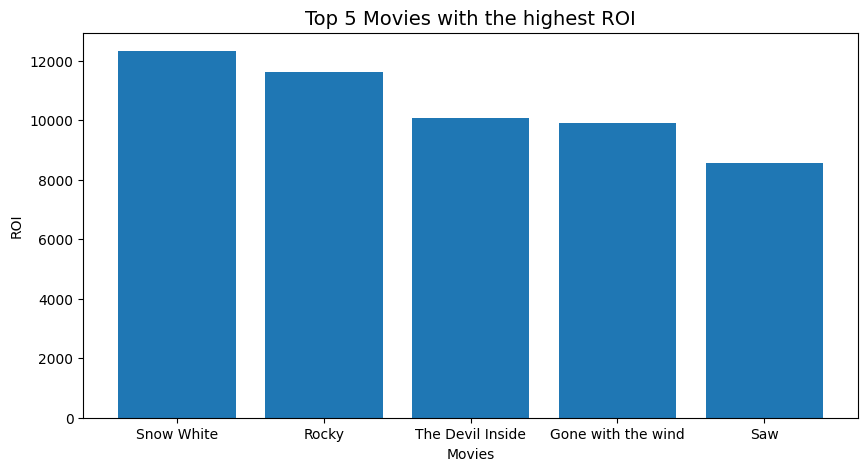

In [ ]:
Movies = ['Snow White', 'Rocky', 'The Devil Inside', 'Gone with the wind', 'Saw']
ROI = [12324.256142, 11623.514700, 10075.849000, 9904.411475, 8559.305750]
plt.figure(figsize=(10, 5))
plt.bar(Movies, ROI)
plt.title('Top 5 Movies with the highest ROI', fontsize=14)
plt.xlabel('Movies')
plt.ylabel('ROI')
plt.show()

> From the output above, the result after sorting the entire dataset by the return of investment (ROI), shows 'Snow White and the Seven Dwarfs' movie has the highest ROI.

**Research Question 2** (What columns contributes to the large form of success of a movie?)

> For the course of this question, the columns in this data set that can contribute to the large form of success of a movie are; ROI, Profit, Genres, Popularity, Production_companies, Revenue, Title, Release_date, Vote_average, Vote_count, Cast and Crew.

> A new column (profit) would be created to further find the form of success.
To find Profit; Revenue - budget

In [ ]:
df_New['profit'] = (df_New['revenue'] - df_New['budget'])
df_New.head()

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew,ROI,profit
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,[Gore Verbinski],220.333333,661000000
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Columbia Pictures, Danjaq, B24]",2015-10-26,6.3,4466,148.0,[Sam Mendes],259.459024,635674609
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[Christian Bale, Michael Caine, Gary Oldman]","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,7.6,9106,165.0,[Christopher Nolan],333.975640,834939099
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Walt Disney Pictures],2012-03-07,6.1,2124,132.0,[Andrew Stanton],9.284269,24139100


To find the large form of success, we would run a scattered plot for visualizastion, in order to check each column, against the new (profit) column craeted.  

<ipython-input-35-29cb5b821982>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_New.corr()


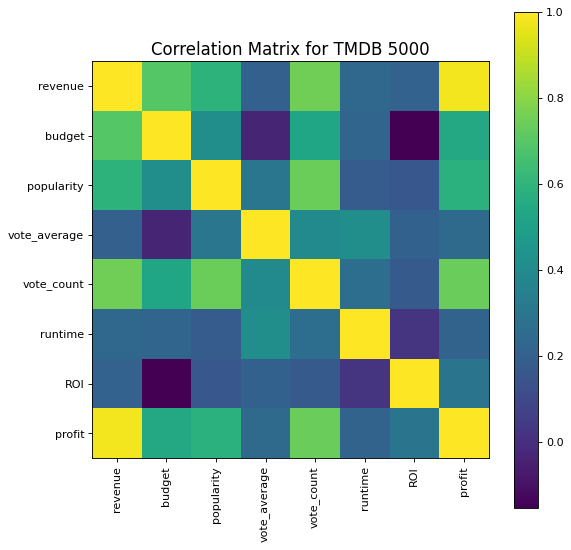

In [ ]:
# Scatter Matrix
corr = df_New.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix for TMDB 5000', fontsize=15)
plt.show()

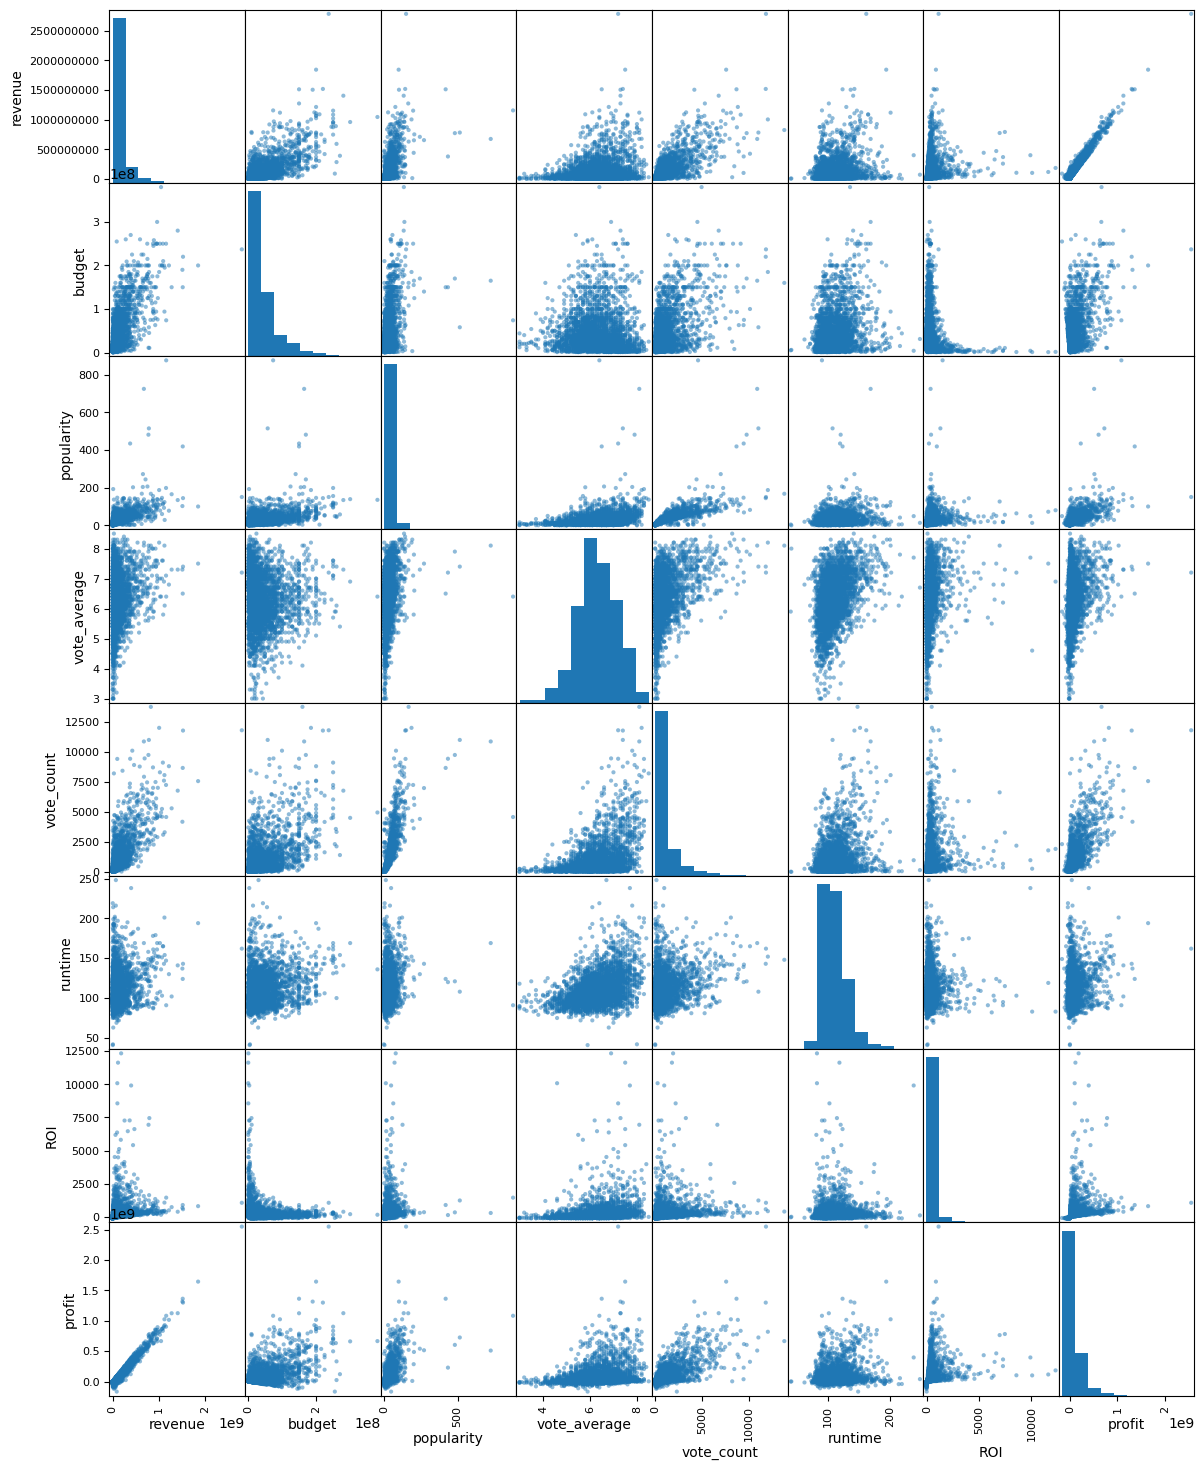

In [ ]:
pd.plotting.scatter_matrix(df_New,figsize=(14,18));
plt.show()

> Ultimately, from the correlation matrix above, the following columns: vote_count, revenue, popularity and vote_average, contributes to the large form of success. It is important to note that that the 'revenue' column has the strongest positive correlation/relationship.                 

> A successful movie often results from a combination of these factors working harmoniously to create an engaging, emotional, and memorable cinematic experience that resonates with audiences.

**Research Question 3** (Investigate the relationship between a movie's budget and its revenue)

The relationship between a movie's budget and its revenue can vary significantly based on factors such as genre, vote_average, vote_count, etc. While there's no one-size-fits-all rule, understanding some general trends and patterns can provide insights into this relationship.

To answer this question i would use a scattered plot visualization to analyze the relationship between the Revenue and Budget columns

<Axes: title={'center': 'Relationship between Budget and Revenue'}, xlabel='revenue', ylabel='budget'>

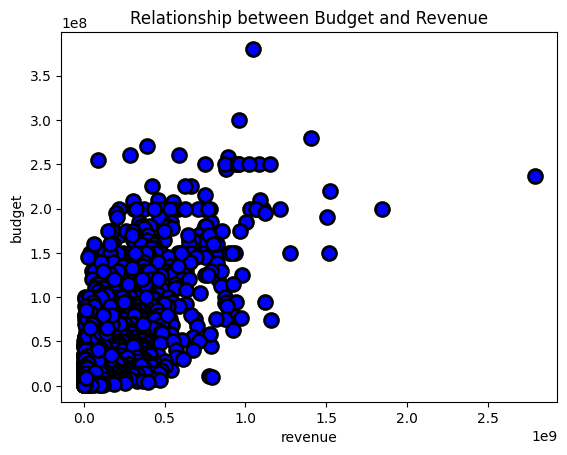

In [ ]:
# code to run scattered plot, including colors and size for better understanding/finesse
df_New.plot.scatter(x = 'revenue', y = 'budget', title = "Relationship between Budget and Revenue", c = 'blue',s = 100, edgecolor = 'black', linewidth = 2)

From the diagram above, we would notice that there's a correlation/relationship between a movie's budget and it's revenue, but a weak postive correlation. In summary, the relationship between a movie's budget and its revenue is complex and influenced by a combination of factors explained above. A successful movie can achieve various degrees of profitability, and its overall impact is often the result of careful consideration of budget allocation, popularity, genre choice and audience engagement (vote_average, vote_count).

**Research Question 4** (Which genre earns the most profit?)

To answer this question, major focus would be on the Genre and Revenue columns, visualization will also be done for better understanding. The 'genre' column contains a list and so we need to expand it within its column.


In [ ]:
df_explode= df_New.explode('genres', ignore_index=True)
df_explode.head()

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew,ROI,profit
0,2787965087,Avatar,237000000,Action,150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
1,2787965087,Avatar,237000000,Adventure,150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
2,2787965087,Avatar,237000000,Fantasy,150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
3,2787965087,Avatar,237000000,Science Fiction,150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
4,961000000,Pirates of the Caribbean: At World's End,300000000,Adventure,139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,[Gore Verbinski],220.333333,661000000


In [ ]:
# drop the cast and production_companies columns, a groupby function wouldn't be possible because they are also in list form
df_explode = df_explode.drop(columns= ['cast', 'production_companies'])
df_explode.head()

,revenue,title,budget,genres,popularity,release_date,vote_average,vote_count,runtime,crew,ROI,profit
0,2787965087,Avatar,237000000,Action,150.437577,2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
1,2787965087,Avatar,237000000,Adventure,150.437577,2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
2,2787965087,Avatar,237000000,Fantasy,150.437577,2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
3,2787965087,Avatar,237000000,Science Fiction,150.437577,2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087
4,961000000,Pirates of the Caribbean: At World's End,300000000,Adventure,139.082615,2007-05-19,6.9,4500,169.0,[Gore Verbinski],220.333333,661000000


Now the dataset would be grouped by the genre column and the total sum of their profit. Next is to sum up to find which genre has the highest profit.

In [ ]:
# using a groupby function, group the dataset by 'genre' and 'total profit' columns
df_genres = df_explode.groupby('genres')['profit'].sum().reset_index(name ='Total_Profit')
print(df_genres)

             genres  Total_Profit
0            Action  105491517237
1         Adventure  112888446075
2         Animation   37074157089
3            Comedy   80232822335
4             Crime   27760355650
5       Documentary     695247732
6             Drama   74876647232
7            Family   57374463576
8           Fantasy   56108616056
9           Foreign      -5900000
10          History    5863080663
11           Horror   15050370768
12            Music    6050176499
13          Mystery   16389915985
14          Romance   36948684307
15  Science Fiction   54439274456
16         Thriller   64589095289
17              War    7261952298
18          Western    1751761495


In [ ]:
# sort by total profit
df_sort = df_genres.sort_values('Total_Profit', ascending=False)
df_sort.head(15)

,genres,Total_Profit
1,Adventure,112888446075
0,Action,105491517237
3,Comedy,80232822335
6,Drama,74876647232
16,Thriller,64589095289
7,Family,57374463576
8,Fantasy,56108616056
15,Science Fiction,54439274456
2,Animation,37074157089
14,Romance,36948684307


Text(0.5, 1.0, 'Movies with the highest Profit generated')

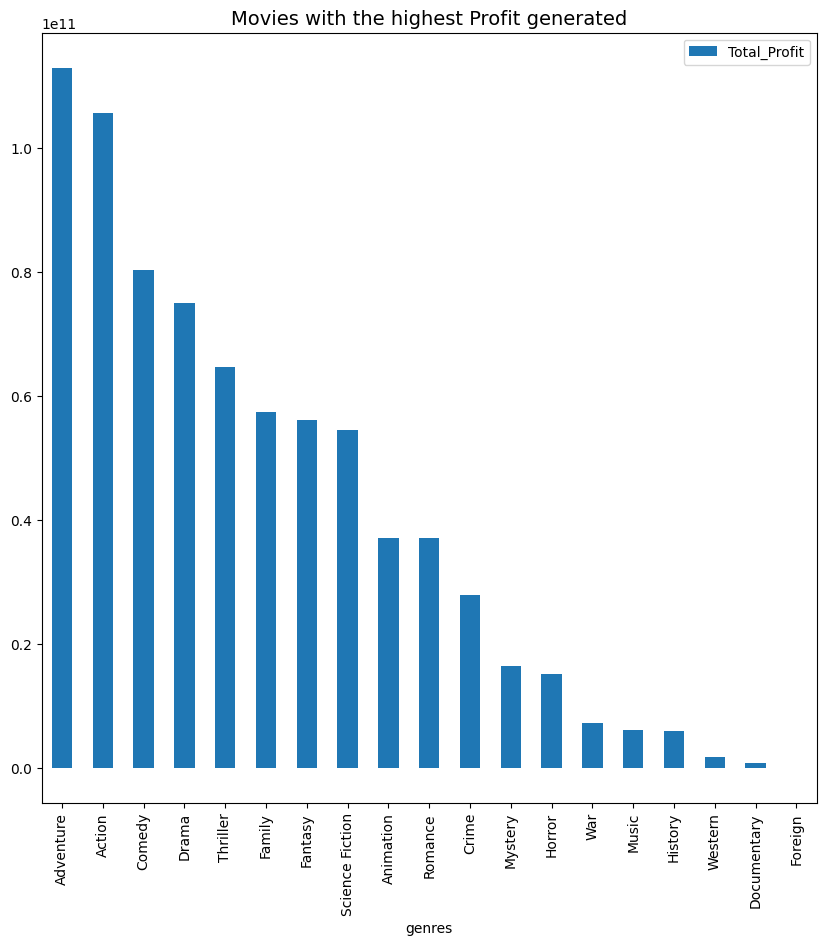

In [ ]:
df_sort.plot(x="genres", y="Total_Profit",
        kind="bar", figsize=(10, 10))
plt.title('Movies with the highest Profit generated', fontsize=14)

With this, the 'Adventure' genre as the highest profit generated.   

**Research Question 5** (Are there specific release dates or periods that tend to generate high revenues or better rating?)

To answer this question, focus would be on the Release_date, V0te_average, Vote_count and Revenue columns

In [ ]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 4726
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   revenue               3002 non-null   int64  
 1   title                 3002 non-null   object 
 2   budget                3002 non-null   int64  
 3   genres                3002 non-null   object 
 4   popularity            3002 non-null   float64
 5   cast                  3002 non-null   object 
 6   production_companies  3002 non-null   object 
 7   release_date          3002 non-null   object 
 8   vote_average          3002 non-null   float64
 9   vote_count            3002 non-null   int64  
 10  runtime               3002 non-null   float64
 11  crew                  3002 non-null   object 
 12  ROI                   3002 non-null   float64
 13  profit                3002 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 416.3+ KB


In [ ]:
# First you need to change the format of date column
df_New['release_date'] = pd.to_datetime(df_New.release_date, format='%Y-%m-%d')
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 4726
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   revenue               3002 non-null   int64         
 1   title                 3002 non-null   object        
 2   budget                3002 non-null   int64         
 3   genres                3002 non-null   object        
 4   popularity            3002 non-null   float64       
 5   cast                  3002 non-null   object        
 6   production_companies  3002 non-null   object        
 7   release_date          3002 non-null   datetime64[ns]
 8   vote_average          3002 non-null   float64       
 9   vote_count            3002 non-null   int64         
 10  runtime               3002 non-null   float64       
 11  crew                  3002 non-null   object        
 12  ROI                   3002 non-null   float64       
 13  profit            

In [ ]:
# specify the format that should be used to parse the strings in the column
df_New['release_date'] = pd.to_datetime(df_New ['release_date'], errors='coerce')

In [ ]:
#  create a new column in the DataFrame that stores the values of the months
df_New['Month'] = df_New['release_date'].dt.strftime('%M')
df_New.head()

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew,ROI,profit,Month
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087,00
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,[Gore Verbinski],220.333333,661000000,00
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Columbia Pictures, Danjaq, B24]",2015-10-26,6.3,4466,148.0,[Sam Mendes],259.459024,635674609,00
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[Christian Bale, Michael Caine, Gary Oldman]","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,7.6,9106,165.0,[Christopher Nolan],333.975640,834939099,00
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Walt Disney Pictures],2012-03-07,6.1,2124,132.0,[Andrew Stanton],9.284269,24139100,00


5a. Are there specific release dates or periods that tend to generate high revenue?

In order to answer this, a groupby fuction would be done and then sort the columns in descending order.

In [ ]:
# Assign the right seasons according to the months in a year
df_New['release_date'] = pd.to_datetime(df_New['release_date'])

seasons = { 1 : 'Winter', 2: 'Winter', 3:'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',  11: 'Fall', 12: 'Winter'}
df_New['season']= df_New['release_date'].dt.month.map(seasons)
grouped_seasons = df_New.groupby('season')

for season,group in grouped_seasons :
  print(group)

         revenue                  title     budget  \
2      880674609                Spectre  245000000   
6      591794936                Tangled  260000000   
11     586090727      Quantum of Solace  200000000   
25    1845034188                Titanic  200000000   
29    1108561013                Skyfall  200000000   
...          ...                    ...        ...   
4349    10047674               Cry_Wolf    1000000   
4355     9000000         Love Me Tender    1000000   
4359     6833445      The Green Inferno    5000000   
4370     2057193    Two Girls and a Guy    1000000   
4726    15861566  The Birth of a Nation    8500000   

                                        genres  popularity  \
2                   [Action, Adventure, Crime]  107.376788   
6                          [Animation, Family]   48.681969   
11        [Adventure, Action, Thriller, Crime]  107.928811   
25                  [Drama, Romance, Thriller]  100.025899   
29               [Action, Adventure, Thri

In [ ]:
df_New.head()

,revenue,title,budget,genres,popularity,cast,production_companies,release_date,vote_average,vote_count,runtime,crew,ROI,profit,Month,season
0,2787965087,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.2,11800,162.0,[James Cameron],1076.356577,2550965087,00,Winter
1,961000000,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.9,4500,169.0,[Gore Verbinski],220.333333,661000000,00,Spring
2,880674609,Spectre,245000000,"[Action, Adventure, Crime]",107.376788,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Columbia Pictures, Danjaq, B24]",2015-10-26,6.3,4466,148.0,[Sam Mendes],259.459024,635674609,00,Fall
3,1084939099,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[Christian Bale, Michael Caine, Gary Oldman]","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,7.6,9106,165.0,[Christopher Nolan],333.975640,834939099,00,Summer
4,284139100,John Carter,260000000,"[Action, Adventure, Science Fiction]",43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Walt Disney Pictures],2012-03-07,6.1,2124,132.0,[Andrew Stanton],9.284269,24139100,00,Spring


In [ ]:
# Grouping revenue and release_date based on the seasons
movies_sub= df_New[['release_date','revenue', 'season']]
grouped_by_season = movies_sub.groupby('season').agg({'release_date': 'count', 'revenue':'sum' })
grouped_seasons_columns = ['number of movies', 'total_revenue']
grouped_by_season.reset_index(inplace=True)
print(grouped_by_season)

   season  release_date       revenue
0    Fall           847   89237555124
1  Spring           666  100401271436
2  Summer           786  121462214903
3  Winter           703   79077806464


In [ ]:
# sort the new data frame (grouped_by_season) by the total revenue in descending order
df_Result = grouped_by_season.sort_values(by="revenue", ascending=False).head(10)
print(df_Result)

   season  release_date       revenue
2  Summer           786  121462214903
1  Spring           666  100401271436
0    Fall           847   89237555124
3  Winter           703   79077806464


From the total revenue sorted above, it is safe to say, movies produced in the summer period have higher revenue than other seasons in a year.

5b. Are there specific release dates or periods that tend to generate better ratings?

To answer this question, the data frame would be grouped by the release dates (months) column and the total vote count.

In [ ]:
# Grouping vote counts and release_date based on the seasons
movies_votes = df_New[['release_date','vote_count', 'season']]
grouped_by_votes = movies_votes.groupby('season').agg({'release_date': 'count', 'vote_count':'sum' })
grouped_votes_columns = ['number of movies', 'total_vote_count']
grouped_by_votes.reset_index(inplace=True)
print(grouped_by_votes)

   season  release_date  vote_count
0    Fall           847      797498
1  Spring           666      775521
2  Summer           786      899391
3  Winter           703      635449


In [ ]:
# sort the new data frame (grouped_by_votes) by the total vote_count in descending order
df_Vote_count = grouped_by_votes.sort_values(by="vote_count", ascending=False).head(10)
print(df_Vote_count)

   season  release_date  vote_count
2  Summer           786      899391
0    Fall           847      797498
1  Spring           666      775521
3  Winter           703      635449


From the release date sorted above, it is safe to say, movies produced in the summer period have higher vote counts than other seasons in a year.

**Research Question 6** (Do longer movies have better rating or higher revenue?)

To answer this question, we would analyze the Runtime, Vote_average and revenue columns.

6a. Do longer movies have better rating ?
Here we would analyze the runtime and vote_average column

In [ ]:
# using a groupby function, group the dataset by 'runtime' and 'total_vote average' columns
df_group = df_New.groupby('runtime')['vote_average'].sum().reset_index(name ='Total_vote average')
print(df_group)

     runtime  Total_vote average
0       41.0                 5.9
1       42.0                 8.0
2       63.0                 6.8
3       69.0                 7.0
4       72.0                11.7
..       ...                 ...
126    214.0                 6.1
127    216.0                 7.8
128    219.0                 6.4
129    238.0                 7.7
130    248.0                 6.7

[131 rows x 2 columns]


In [ ]:
# first is to sort the new data frame by total_vote average in descending order
df_grouped = df_group.sort_values(by="Total_vote average", ascending=False).head(10)
df_grouped.head(10)

,runtime,Total_vote average
31,100.0,581.7
29,98.0,502.9
37,106.0,448.0
39,108.0,445.9
35,104.0,432.0
28,97.0,428.3
36,105.0,422.6
30,99.0,414.9
41,110.0,409.6
33,102.0,406.2


Ultimately, movies with runtime from 100 minutes upwards, has higher vote average in total, than movies below a 100 minutes.

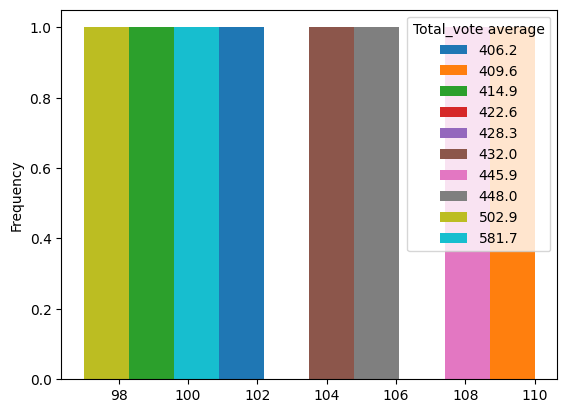

In [ ]:
df_grouped.pivot(columns='Total_vote average', values='runtime').plot.hist()
plt.show()

6b. Do longer movies have higher revenue ?

Here we would analyze the runtime and revenue column

In [ ]:
# using a groupby function, group the dataset by 'runtime' and 'total revenue' columns
df_revenue = df_New.groupby('runtime')['revenue'].sum().reset_index(name ='Total revenue')
print(df_revenue)

     runtime  Total revenue
0       41.0        4074023
1       42.0        7518876
2       63.0       14460000
3       69.0       84460846
4       72.0      245542682
..       ...            ...
126    214.0       12923936
127    216.0       69995385
128    219.0        3484331
129    238.0      400176459
130    248.0       71000000

[131 rows x 2 columns]


In [ ]:
# first is to sort the new data frame by total revenue in descending order
df_revenue = df_revenue.sort_values(by="Total revenue", ascending=False).head(10)
df_revenue.head(10)

,runtime,Total revenue
55,124.0,9532276875
46,115.0,9402001524
31,100.0,8844701802
39,108.0,8762710707
37,106.0,8639565040
29,98.0,8247749627
22,91.0,7883658953
58,127.0,7875613524
33,102.0,7777419392
24,93.0,7628445846


Ultimately, movies with runtime from 100 minutes upwards, has higher revenue in total, than movies below a 100 minutes.

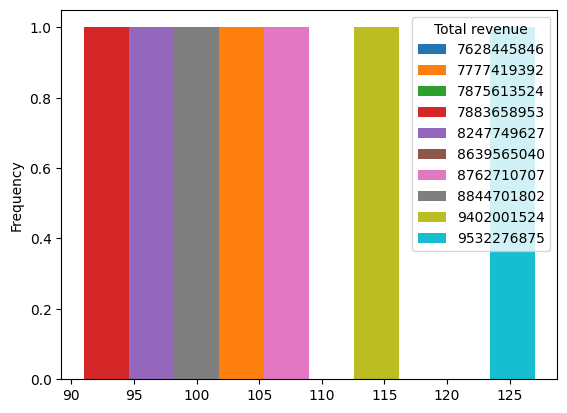

In [ ]:
df_revenue.pivot(columns='Total revenue', values='runtime').plot.hist()
plt.show()

# **Conclusion**
The motivation for this project is to determine the factors responsible for the success of a movie. These factors includes;

The financial success, The relationship between major factors that determines the success of a movie, The type of Genre movie investors can pump money into as this would generate high profit, The best season in the year to produce movies and the runtime that would generate high revenue.

After analysis, it is safe to say, the financial success of a movie is determined by the Return on Investment (ROI), the Adventure genre is the most advisable genre to invest in. Also, the chances of generating a good revenue is high if the movies are produced during summer with at least a 100 minutes of runtime.

# **THANK YOU**